In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box
import fiona
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
# A package created for this class that will be discussed later in this lesson
import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
import seaborn as sns
sns.set(font_scale=1.5, style="white")

# Get data and set wd
# et.data.get_data("colorado-flood")
# os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))


In [2]:
# Open raster data
amphibs = rio.open(r'C:\Users\emack\Documents\UAF-Temperature\data\amphibians.tif')


In [3]:
# Query the spatial extent of the data
amphibs.bounds


BoundingBox(left=-180.0, bottom=-54.76666639372698, right=180.00835210923083, top=71.53334019333124)

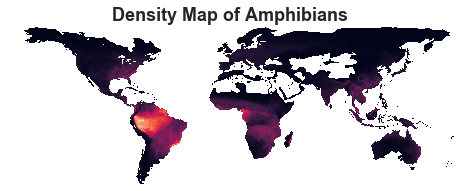

In [5]:
# Plot the dem using raster.io
fig, ax = plt.subplots(figsize = (8,3))
show(amphibs, 
     title="Density Map of Amphibians", 
     ax=ax)
ax.set_axis_off()


In [6]:
with rio.open(r'C:\Users\emack\Documents\UAF-Temperature\data\amphibians.tif') as src:
    # Convert / read the data into a numpy array:
    amphib_im = src.read()
    # Create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)
    # Get bounds of object
    bounds = src.bounds


In [7]:
with rio.open(r'C:\Users\emack\Documents\UAF-Temperature\data\amphibians.tif') as src:
    # convert / read the data into a numpy array: masked= True turns `nodata` values to nan
    amphib_im = src.read(1, masked=True)
    # create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)

print("object shape:", amphib_im.shape)
print("object type:", type(amphib_im))


object shape: (15156, 43201)
object type: <class 'numpy.ma.core.MaskedArray'>


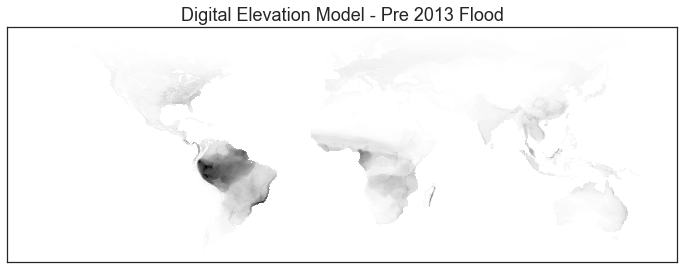

In [8]:
ep.plot_bands(amphib_im,
              cmap='Greys',
              extent=spatial_extent,
              title="Digital Elevation Model - Pre 2013 Flood",
              cbar=False)
plt.show()
